# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** \
**Email:**

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

Observed 6 sixes out of 10 rolls
P(A | 6 sixes) = 0.000
P(B | 6 sixes) = 0.128
P(C | 6 sixes) = 0.872
True die: C


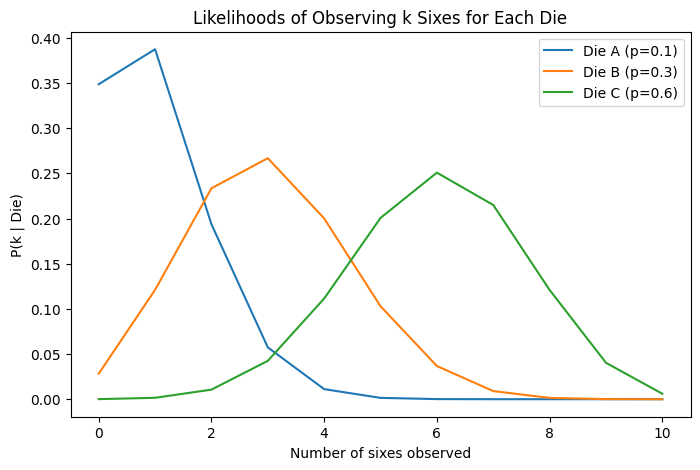

Accuracy over 100 rounds: 0.66


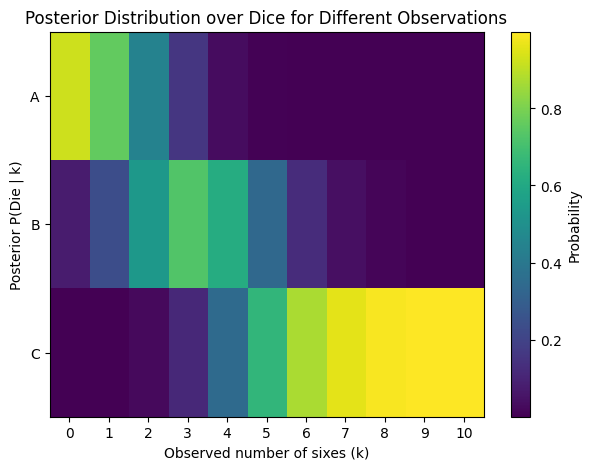

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.array([1/3, 1/3, 1/3])
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
    pass

def simulate_round():
   true_die = np.random.choice(dice_names)
   p_six = dice_probs[true_die]
   k = np.sum(np.random.random(n_rolls) < p_six)
   return true_die, k
   pass

def posterior_given_k(k):
    likelihoods = np.array([binomial_prob(n_rolls, k, dice_probs[die]) for die in dice_names])
    posterior = prior * likelihoods
    posterior = posterior / posterior.sum()  # Normalize
    return posterior
    pass

# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [12]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred = X @ theta
mse_linear = np.mean((y - y_pred) ** 2)
print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [5. 0.] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)


α = 1/400:
Step 0: w = 13.0000, f(w) = 80.0000
Step 1: w = 12.6000, f(w) = 32.7680
Step 2: w = 12.3952, f(w) = 18.9459
Step 3: w = 12.2594, f(w) = 12.5786
Step 4: w = 12.1595, f(w) = 9.0385

α = 1/4000000:
Step 0: w = 13.0000, f(w) = 80.0000
Step 1: w = 13.0000, f(w) = 79.9936
Step 2: w = 12.9999, f(w) = 79.9872
Step 3: w = 12.9999, f(w) = 79.9808
Step 4: w = 12.9998, f(w) = 79.9744


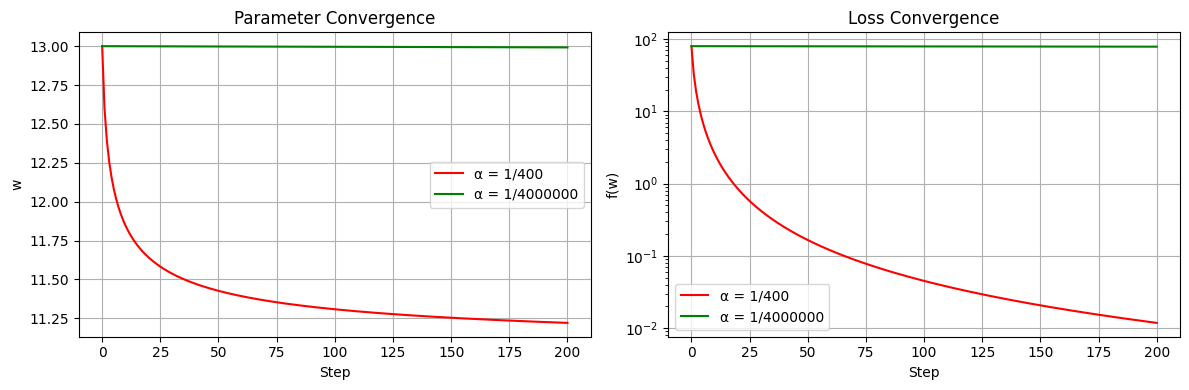

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#fn
def f(w):
    return 5 * (w - 11) ** 4
#dfn
def df(w):
    return 20 * (w - 11) ** 3
# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    history = []
    w = w0
    
    for step in range(steps + 1):
        history.append((w, f(w)))
        if step < steps:
            w = w - alpha * df(w)
    return history

# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

print("\nα = 1/400:")
for i in range(5):
    print(f"Step {i}: w = {hist_140[i][0]:.4f}, f(w) = {hist_140[i][1]:.4f}")

print("\nα = 1/4000000:")
for i in range(5):
    print(f"Step {i}: w = {hist_180[i][0]:.4f}, f(w) = {hist_180[i][1]:.4f}")

# Extract values for plotting
w_vals_140 = [h[0] for h in hist_140]
f_vals_140 = [h[1] for h in hist_140]
w_vals_180 = [h[0] for h in hist_180]
f_vals_180 = [h[1] for h in hist_180]

# Simple plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(w_vals_140, 'r-', label='α = 1/400')
plt.plot(w_vals_180, 'g-', label='α = 1/4000000')
plt.xlabel('Step')
plt.ylabel('w')
plt.title('Parameter Convergence')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(f_vals_140, 'r-', label='α = 1/400')
plt.semilogy(f_vals_180, 'g-', label='α = 1/4000000')
plt.xlabel('Step')
plt.ylabel('f(w)')
plt.title('Loss Convergence')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

ALL THE BEST!